In [1]:
import numpy as np
import qutip as qt
from matplotlib import pyplot as plt

In [5]:
###Now we define the states/operators of the three level atom
state1,state2,state3 = qt.states.qutrit_basis() #These are the three levels of our atom

sig12 = state1*state2.dag()
sig21 = sig12.dag()
sig13 = state1*state3.dag()
sig31 = sig13.dag()

sig11 = state1*state1.dag()
sig22 = state2*state2.dag()
sig33 = state3*state3.dag()

In [95]:
###We now define the Hamiltonian 
#We first consider the case where there is no detuning; only Rabi couplings
#We also start in the Lambda scheme so that the drives are applied as 2->1, 3->1
#We add detunings to the 2 and 3 levels of Delta2 and Delta3 
def H(Omega2,Omega3,Delta2,Delta3):
    return .5*Omega2*(sig12+sig21) + .5*Omega3*(sig13+sig31) + Delta2*sig22 + Delta3*sig33

In [96]:
###And the jump operators 
#We have Lambda which means the decays go 1->2 and 1->3
def coll(Gamma2,Gamma3):
    return [np.sqrt(Gamma2)*sig21,np.sqrt(Gamma3)*sig31]

In [97]:
###This function returns the steady state density matrix given the parameters
def rhoSS(Omega2,Omega3,Gamma2,Gamma3,Delta2,Delta3):
    return qt.steadystate(H(Omega2,Omega3,Delta2,Delta3),coll(Gamma2,Gamma3))

def pop2SS(Omega2,Omega3,Gamma2,Gamma3,Delta2,Delta3):
    return qt.expect( state2*state2.dag(),rhoSS(Omega2,Omega3,Gamma2,Gamma3,Delta2,Delta3) )

def pop3SS(Omega2,Omega3,Gamma2,Gamma3,Delta2,Delta3):
    return qt.expect( state3*state3.dag(),rhoSS(Omega2,Omega3,Gamma2,Gamma3,Delta2,Delta3) )


In [129]:
numPoints = 20 
minDrive = 0.01
maxDrive = 5.0

Omega3 = 0.5

Gamma = 1.0
Delta2 = 2.5
Delta3 = -1.5

driveList = np.linspace(minDrive,maxDrive,numPoints)

pop2SSArray = np.zeros(shape=numPoints)
pop3SSArray = np.zeros(shape=numPoints)

In [130]:
for j in np.arange(numPoints):
    pop2SSArray[j] = pop2SS(driveList[j],Omega3,Gamma,Gamma,Delta2,Delta3)
    pop3SSArray[j] = pop3SS(driveList[j],Omega3,Gamma,Gamma,Delta2,Delta3)

In [131]:
plt.plot(driveList,pop2SSArray)
plt.plot(driveList,pop3SSArray)

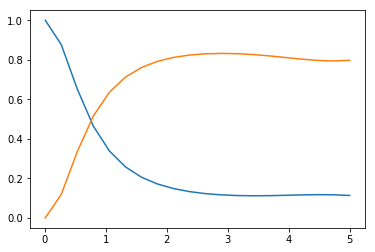

In [132]:
plt.show()